## Use matplotlib for interactive plotting: Quiver Plot

Example from https://stackoverflow.com/questions/40122837/interactive-matplotlib-using-ipywidgets
using the quiver plot function from https://matplotlib.org/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py

In [5]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
# We introduce a parameter w to rotate the arrows
w = 0.25
# N is the number of gridpoints on each axis
N=20
#X and Y set the coordinates of the arrows' bases
X = np.linspace(-0.25,1.25,N)
Y = np.linspace(-0.25, 1.25, N)


def arrow_directions(w):
    """Returns arrow directions for angle w*np.pi"""
    # first we define the scalar coordinates of dimension 20
    u = X*np.cos(w*np.pi)
    v = Y*np.sin(w*np.pi)
    return np.meshgrid(u,v)

# U and V set the direction each arrow points to
U, V = arrow_directions(w)

We define options for the quiver plot look.

In [7]:
opts=dict(pivot='mid',angles='xy', units='x', headwidth='4', headlength='4.5')#, headaxislength='4.5')

We construct the figure using a helper function.

<IPython.core.display.Javascript object>


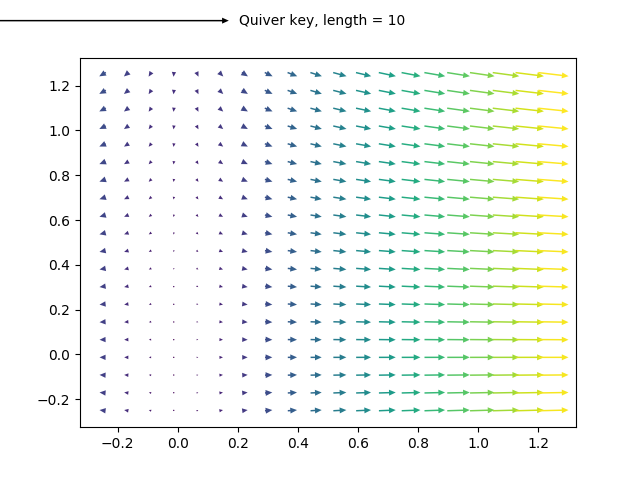

interactive(children=(FloatSlider(value=0.25, description='w', max=0.75, min=-0.25), Output()), _dom_classes=(…

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def plot_quiver(U,V):
    """wrapper to plot the vector field"""
    # use the length of the arrows to create a color map
    M = np.hypot(U, V)
    q = ax.quiver(X, Y, U, V, M,**opts)
    ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
    fig.show()

plot_quiver(U,V)

def update(w = 0.25):
    # U and V set the direction each arrow points to
    U, V = arrow_directions(w)
    ax.clear()
    plot_quiver(U,V)

interact(update);